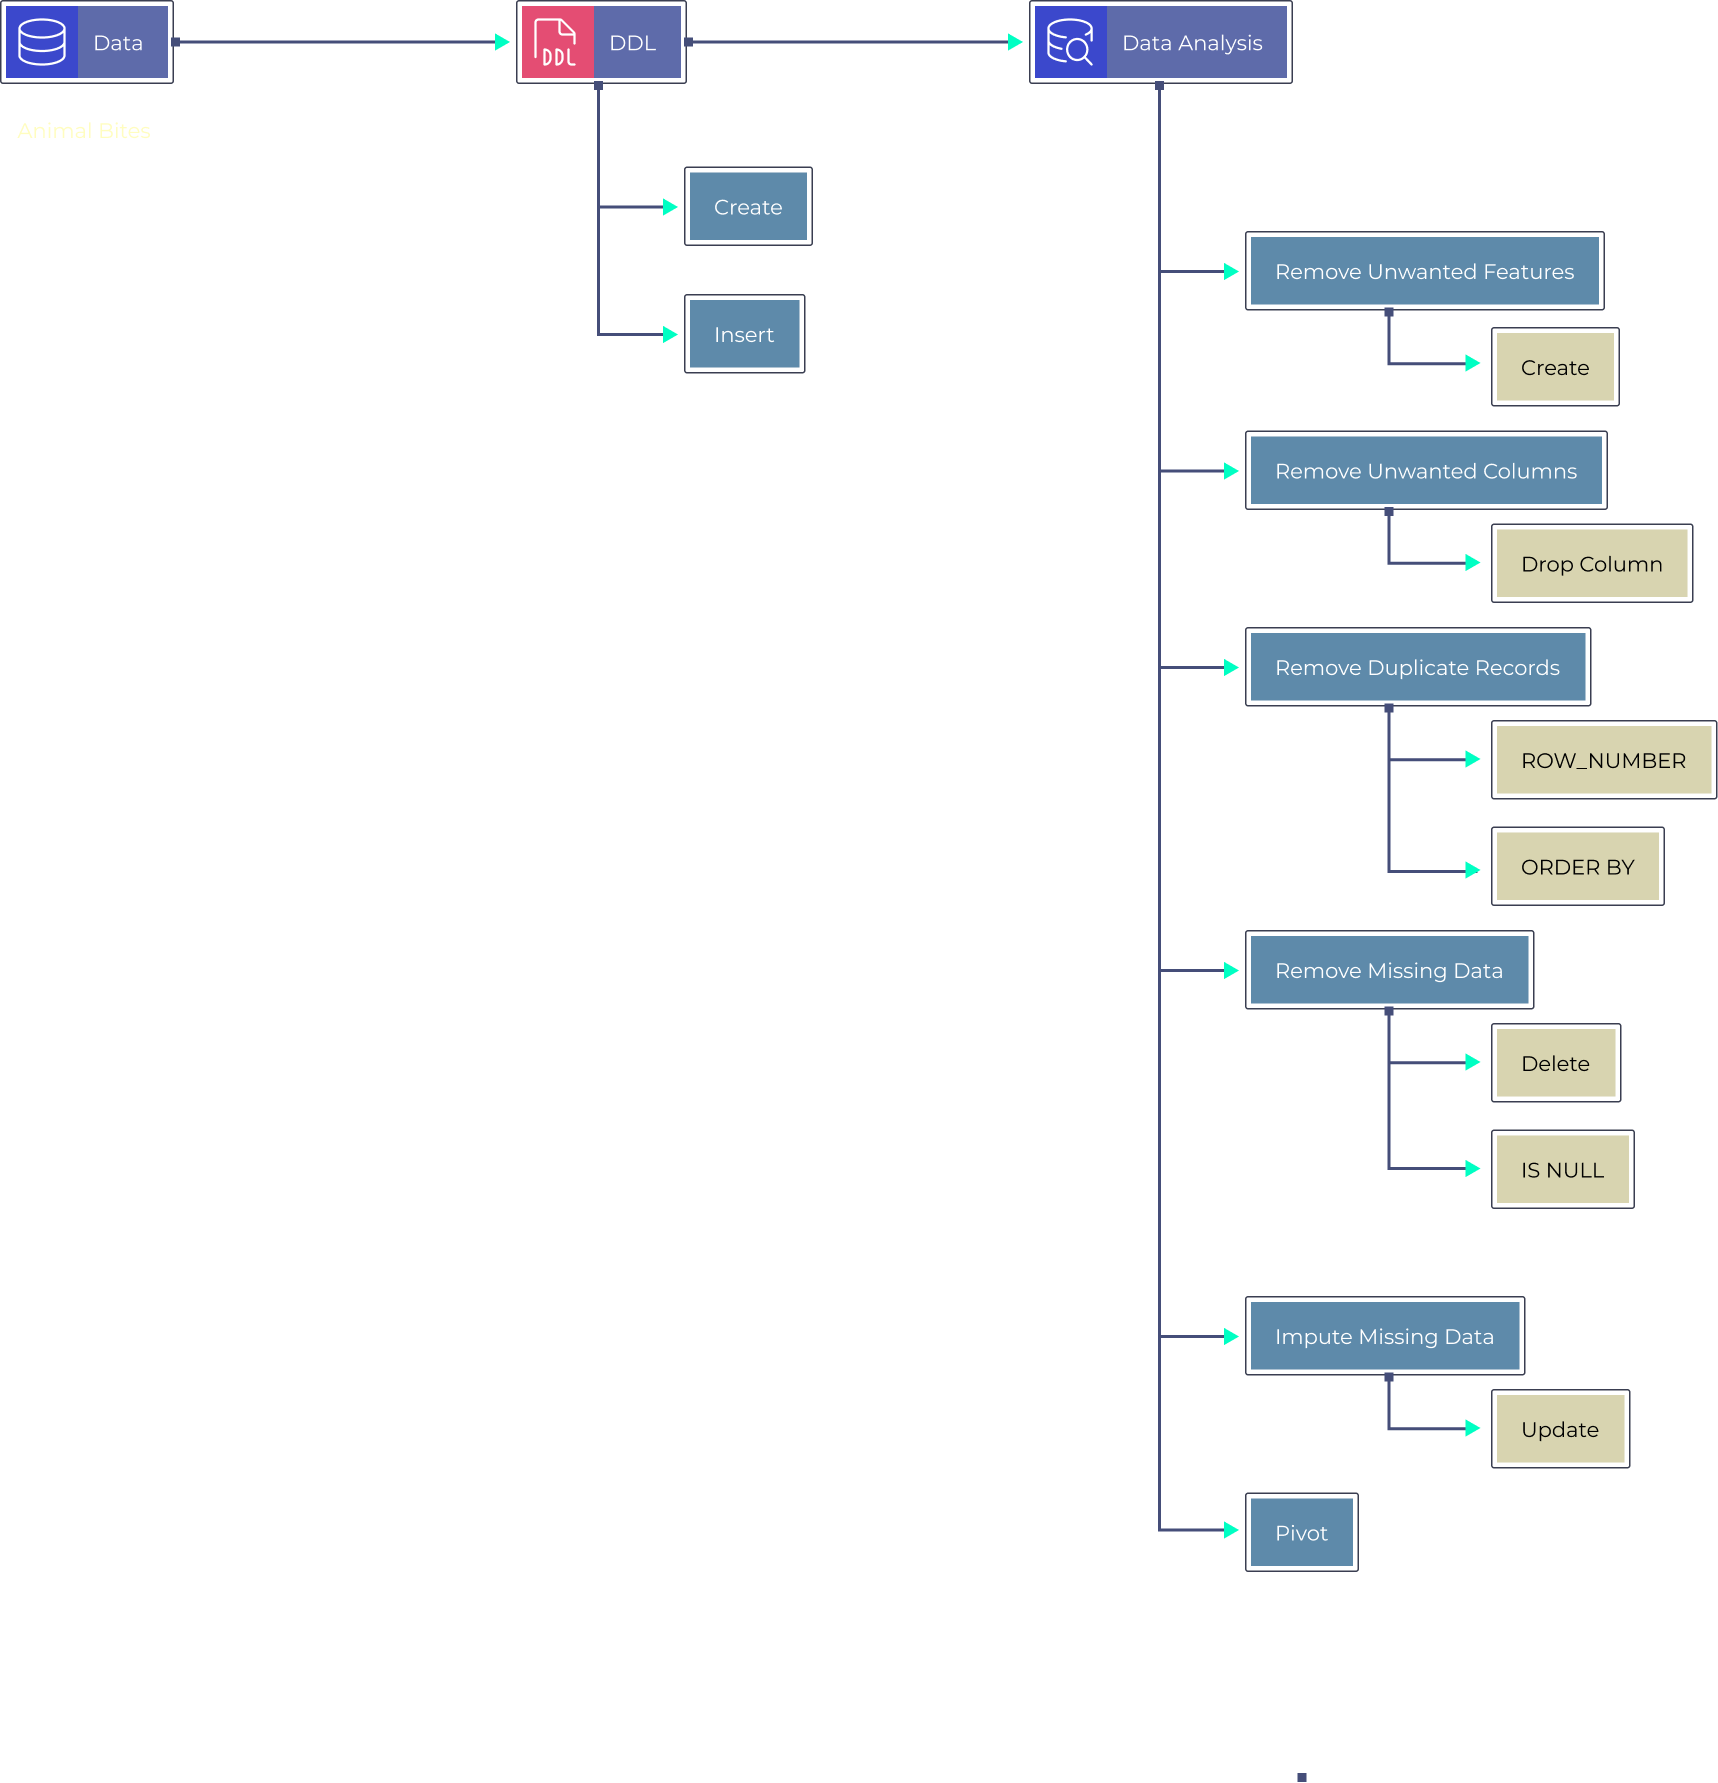

# In this SQL project, you will learn the basics of data wrangling with SQL to perform operations on missing data, unwanted features and duplicated records.

- Understanding the project and how to use Oracle SQL Developer.
- Understanding the basics of data analysis, SQL commands, and their application.
- Understanding the use of Oracle SQL Developer.
- Understanding the concept of Data Wrangling.
- Remove unwanted features from data using SQL queries.
- Deal with missing data.
- How to remove missing data using SQL queries.
- How to impute missing data using SQL queries.
- Understanding Pivot and Unpivot functions in SQL.
- Pivoting rows to columns using SQL queries.
- Pivoting rows to columns with joins using SQL queries.

This is the sixth project in the SQL project series; the fifth project involved the data analysis using different SQL functions like ROW_NUMBER, RANK, DENSE_RANK, SUBSTR, INSTR, COALESCE and NVL. It also involved the use of some built-in functions like concat, upper, lower, initcap, rtrim, ltrim, length, lpad, rpad. This project involves the introduction to Data Wrangling, operations on missing data, unwanted features and duplicated records. It also involves the use of the pivot and unpivot functions in SQL.

In [ ]:

SELECT * FROM ANIMAL_BITES;
SELECT * FROM ANIMAL_BITES_USERFUL_FEATURE;

SELECT COUNT(*)
FROM ANIMAL_BITES;



In [ ]:


/************************** 2. Remove Unwanted Features **************************/

--1. Create a new table with only required columns
CREATE TABLE ANIMAL_BITES_USERFUL_FEATURE AS
SELECT ID, BITE_DATE, SPECIESIDDESC, BREEDIDDESC, BREED, GENDERIDDESC, COLOR, VICTIM_ZIP, WHEREBITTENIDDESC, ENTRY_ID
FROM ANIMAL_BITES;


--2. DROP unwanted columns

--Create backup table
CREATE TABLE ANIMAL_BITES_BACKUP
AS
SELECT * FROM ANIMAL_BITES;

--DROP SINGLE COLUMN
ALTER TABLE ANIMAL_BITES DROP COLUMN vaccination_yrs;

--DROP MULTIPLE COLUMNS
ALTER TABLE ANIMAL_BITES DROP (  vaccination_date,
  AdvIssuedYNDesc,
  quarantine_date,
  DispositionIDDesc,
  head_sent_date,
  release_date,
  ResultsIDDesc,
  FollowupYNDesc,
  ENTRY_ID);



In [ ]:

SELECT * FROM ANIMAL_BITES;
/************************** 3. Remove Duplicate records **************************/

--Create new table with required data.
CREATE TABLE ANIMAL_BITES_UNIQUE AS
SELECT ID,
  BITE_DATE,
  SPECIESIDDESC,
  BREEDIDDESC,
  BREED,
  GENDERIDDESC,
  COLOR,
  VICTIM_ZIP,
  WHEREBITTENIDDESC
FROM
  (SELECT T.*,
    ROW_NUMBER () OVER (PARTITION BY id ORDER BY BITE_DATE DESC) rn
  FROM ANIMAL_BITES T
  ) T
WHERE RN = 1;

--Remove duplicate records
DELETE
FROM ANIMAL_BITES
WHERE ROWID IN
  (SELECT ROWID
  FROM
    (SELECT T.*,
      ROW_NUMBER () OVER (PARTITION BY id ORDER BY BITE_DATE DESC) rn
    FROM ANIMAL_BITES T
    )
  WHERE RN > 1
  );



In [ ]:

/************************** 4. Removing Missing Data **************************/

--Create a new table with valid records
CREATE TABLE ANIMAL_BITES_MANDATORY AS
SELECT *
FROM ANIMAL_BITES
WHERE BITE_DATE   IS NOT NULL
AND SPECIESIDDESC IS NOT NULL
AND VICTIM_ZIP    IS NOT NULL;

SELECT * FROM ANIMAL_BITES_MANDATORY;
--Remove rows with missing values in bite_date, SpeciesIDDesc, victim_zip
DELETE
FROM ANIMAL_BITES
WHERE BITE_DATE  IS NULL
OR SPECIESIDDESC IS NULL
OR VICTIM_ZIP    IS NULL;


In [ ]:

/************************** 5. Imputing Missing Data **************************/

SELECT COUNT(*) FROM ANIMAL_BITES WHERE BREEDIDDESC IS NULL;

UPDATE ANIMAL_BITES
SET BREEDIDDESC = 'UNKNOWN'
WHERE BREEDIDDESC IS NULL;

SELECT COUNT(*) FROM ANIMAL_BITES WHERE BREEDIDDESC = 'UNKNOWN';

SELECT COUNT(*) FROM ANIMAL_BITES WHERE BREED IS NULL;

UPDATE ANIMAL_BITES
SET BREED = 'UNKNOWN'
WHERE BREED IS NULL;

SELECT COUNT(*) FROM ANIMAL_BITES WHERE GENDERIDDESC IS NULL;

UPDATE ANIMAL_BITES
SET GENDERIDDESC = 'UNKNOWN'
WHERE GENDERIDDESC IS NULL;

SELECT COUNT(*) FROM ANIMAL_BITES WHERE COLOR IS NULL;

UPDATE ANIMAL_BITES
SET COLOR = 'UNKNOWN'
WHERE COLOR IS NULL;

SELECT COUNT(*) FROM ANIMAL_BITES WHERE WHEREBITTENIDDESC IS NULL;

UPDATE ANIMAL_BITES
SET WHEREBITTENIDDESC = 'UNKNOWN'
WHERE WHEREBITTENIDDESC IS NULL;





In [ ]:

/************************** 7. Pivoting rows to columns **************************/

/*
SELECT <non-pivoted column>,
    [first pivoted column] AS <column name>,
    [second pivoted column] AS <column name>,
    ...
    [last pivoted column] AS <column name>
FROM
    (<SELECT query that produces the data>)
    AS <alias for the source query>
PIVOT
(
    <aggregation function>(<column being aggregated>)
FOR
[<column that contains the values that will become column headers>]
    IN ( [first pivoted column], [second pivoted column],
    ... [last pivoted column])
) AS <alias for the pivot table>
<optional ORDER BY clause>;
*/

--Job id wise total salary
SELECT JOB_ID, SUM(SALARY) AS TOTAL_SALARY
FROM EMPLOYEES
where job_id in ('AD_VP', 'FI_ACCOUNT' , 'PU_CLERK')
GROUP BY JOB_ID;


SELECT *
FROM
  (
  SELECT 'JOB ID WISE TOTAL SALARY' HEADER, JOB_ID, SALARY FROM EMPLOYEES
  )
PIVOT
  (
    SUM(SALARY) FOR JOB_ID IN ('AD_VP', 'FI_ACCOUNT', 'PU_CLERK')
  );


--department and Job id wise total salary
SELECT DEPARTMENT_ID, JOB_ID, SUM(SALARY) AS TOTAL_SALARY
FROM EMPLOYEES
WHERE DEPARTMENT_ID IS NOT NULL
and job_id in ('AD_VP', 'FI_ACCOUNT' , 'PU_CLERK')
GROUP BY JOB_ID, DEPARTMENT_ID
ORDER BY DEPARTMENT_ID;


SELECT *
FROM
  (
  SELECT 'department and Job id wise total salary' HEADER, DEPARTMENT_ID, JOB_ID, SALARY FROM EMPLOYEES
  WHERE DEPARTMENT_ID IS NOT NULL
  and job_id in ('AD_VP', 'FI_ACCOUNT' , 'PU_CLERK')
  )
PIVOT
  (
    SUM(SALARY) FOR JOB_ID IN ('AD_VP', 'FI_ACCOUNT', 'PU_CLERK')
  )
  ORDER BY DEPARTMENT_ID;

# HEADER	DEPARTMENT_ID	'AD_VP'	'FI_ACCOUNT'	'PU_CLERK'
# department and Job id wise total salary	30			13900
# department and Job id wise total salary	90	34000
# department and Job id wise total salary	100		39600


--Location wise number of department
SELECT LOCATION_ID, COUNT(*)
FROM DEPARTMENTS
GROUP BY LOCATION_ID;




SELECT
    *
FROM
    (
        SELECT
            'location wise number of department' description,
            location_id
        FROM
            departments t
    ) PIVOT (
        COUNT(*)
        FOR location_id
        IN ( 1700,
        1400,
        2400,
        1500,
        1800,
        2500,
        2700 )
    );

# DESCRIPTION	1700	1400	2400	1500	1800	2500	2700
# location wise number of department	21	1	1	1	1	1	1

In [ ]:

/************************** 8. Pivoting rows to columns with Join **************************/

SELECT
    LISTAGG(city)
FROM
    (
        SELECT DISTINCT
            ''''
            || l.city
            || ''',' AS city
        FROM
            departments d,
            locations   l
        WHERE
            d.location_id = l.location_id
    );

# 'Southlake','South San Francisco','Seattle','Toronto','London','Oxford','Munich',


In [ ]:
/************************** 9. UNPIVOT **************************/

SELECT
    *
FROM
    (
        SELECT
            'location wise number of department' description,
            l.city
        FROM
            departments d,
            locations   l
        WHERE
            d.location_id = l.location_id
    ) PIVOT (
        COUNT(*)
        FOR city
        IN ( 'Seattle' AS seattle, 'Toronto' AS toronto, 'London' AS london, 'Southlake' AS southlake, 'South San Francisco' AS south_san_francisco
        , 'Munich' AS munich, 'Oxford' AS oxford )
    );




--UNPIVOT
SELECT
    *
FROM
    (
        SELECT
            employee_id,
            first_name,
            last_name,
            email,
            phone_number,
            job_id,
            to_char(hire_date, 'DD/MON/YYYY') AS hire_date,
            to_char(salary)                   AS salary,
            to_char(commission_pct)           AS commission_pct,
            to_char(manager_id)               AS manager_id,
            to_char(department_id)            AS department_id
        FROM
            employees
    ) UNPIVOT ( attribute_name
        FOR atribute_value
    IN ( "FIRST_NAME",
         "LAST_NAME",
         "EMAIL",
         "PHONE_NUMBER",
         "JOB_ID",
         "HIRE_DATE",
         "SALARY",
         "COMMISSION_PCT",
         "MANAGER_ID",
         "DEPARTMENT_ID" ) );

In [ ]:
# ANIMAL_BITES_DDL
CREATE TABLE ANIMAL_BITES
(	ID VARCHAR2(100 BYTE),
	BITE_DATE VARCHAR2(100 BYTE),
	SPECIESIDDESC VARCHAR2(100 BYTE),
	BREEDIDDESC VARCHAR2(100 BYTE),
	BREED VARCHAR2(100 BYTE),
	GENDERIDDESC VARCHAR2(100 BYTE),
	COLOR VARCHAR2(100 BYTE),
	VACCINATION_YRS VARCHAR2(100 BYTE),
	VACCINATION_DATE VARCHAR2(100 BYTE),
	VICTIM_ZIP VARCHAR2(100 BYTE),
	ADVISSUEDYNDESC VARCHAR2(100 BYTE),
	WHEREBITTENIDDESC VARCHAR2(100 BYTE),
	QUARANTINE_DATE VARCHAR2(100 BYTE),
	DISPOSITIONIDDESC VARCHAR2(100 BYTE),
	HEAD_SENT_DATE VARCHAR2(100 BYTE),
	RELEASE_DATE VARCHAR2(100 BYTE),
	RESULTSIDDESC VARCHAR2(100 BYTE),
	FOLLOWUPYNDESC VARCHAR2(100 BYTE),
	ENTRY_ID NUMBER
);


REM INSERTING into ANIMAL_BITES
SET DEFINE OFF;
Insert into ANIMAL_BITES (ID,BITE_DATE,SPECIESIDDESC,BREEDIDDESC,BREED,GENDERIDDESC,COLOR,VACCINATION_YRS,VACCINATION_DATE,VICTIM_ZIP,ADVISSUEDYNDESC,WHEREBITTENIDDESC,QUARANTINE_DATE,DISPOSITIONIDDESC,HEAD_SENT_DATE,RELEASE_DATE,RESULTSIDDESC,FOLLOWUPYNDESC,ENTRY_ID) values ('518378','2012-06-30 00:00:00','SKUNK',null,'SKUNK','MALE',null,null,null,'40245',null,'BODY',null,null,null,null,null,'NO',null);
Insert into ANIMAL_BITES (ID,BITE_DATE,SPECIESIDDESC,BREEDIDDESC,BREED,GENDERIDDESC,COLOR,VACCINATION_YRS,VACCINATION_DATE,VICTIM_ZIP,ADVISSUEDYNDESC,WHEREBITTENIDDESC,QUARANTINE_DATE,DISPOSITIONIDDESC,HEAD_SENT_DATE,RELEASE_DATE,RESULTSIDDESC,FOLLOWUPYNDESC,ENTRY_ID) values ('734599','2022-02-05 00:00:00','DOG',null,'SHEPHERD','MALE','BLACK/BRWN',null,null,'40218',null,'BODY',null,null,null,null,null,'YES',null);

COMMIT;